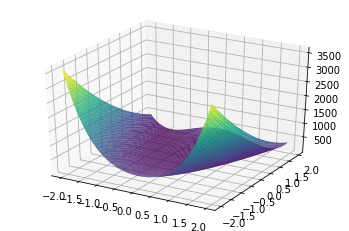

In [139]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = 100 * (Y - (X * X)) * (Y - (X * X)) + (1 - X) * (1 - X)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

fig.show()


### minimum point is (1, 1)

In [118]:
def eval_rosenbrock(x):
    return 100 * (x[1] - (x[0] * x[0])) * (x[1] - (x[0] * x[0])) + (1 - x[0]) * (1 - x[0])

def grad_rosenbrock(x):
    return np.array([-400 * x[0] * (x[1] - (x[0] * x[0])) - 2 * (1 - x[0]), 200 * (x[1] - (x[0] * x[0]))])

def backtracking_search_rosenbrock(x, step, direction, grad, c1, roh):
    while eval_rosenbrock(x + step * direction) > eval_rosenbrock(x) + c1 * step * np.dot(grad, direction):
        step = step * roh
    return step

def steepest_descent_rosenbrock(x):
    return - np.array([-400 * x[0] * (x[1] - (x[0] * x[0])) - 2 * (1 - x[0]), 200 * (x[1] - (x[0] * x[0]))])

def newton_descent_rosenbrock(x):
    #hessian
    h = np.array([[-400 * (x[1] - 3 * x[0] * x[0]) + 2, -400 * x[0]], [-400 * x[0], 200]])
    #inverse hessian
    inv_h = 1 / (h[0][0] * h[1][1] - h[0][1] * h[1][0]) * np.array([[h[1][1], -h[0][1]], [-h[1][0], h[0][0]]])
    #gradient
    grad = grad_rosenbrock(x)
    return - np.dot(inv_h, grad)
    
def save_state(epocs, x, vals, grads):
    if epocs % 1 == 0:
        vals.append(eval_rosenbrock(x))
        grads.append(grad_rosenbrock(x))

def optimize_steepest_descent_rosenbrock(x_init, method = 'steepest_descent', step_init = 1, roh = 0.5, c1 = 1e-4, acc = 1e-4):
    
    x = x_init
    step = step_init
    vals = []
    grads = []
    args_x1 = []
    args_x2 = []
    dirs = []
    steps = []
    epocs = 1
    
    args_x1.append(x[0])
    args_x2.append(x[1])
    vals.append(eval_rosenbrock(x))
    grads.append(grad_rosenbrock(x))
    
    while True:
        #gradient
        grad = grad_rosenbrock(x)
        #descent direction
        direction = steepest_descent_rosenbrock(x)
        if method == 'newton_descent':
            direction = newton_descent_rosenbrock(x)
        #step length
        step = backtracking_search_rosenbrock(x, step, direction, grad, c1, roh)
        #new point
        x += step * direction
    
        dirs.append(direction)
        steps.append(step)
        vals.append(eval_rosenbrock(x))
        grads.append(grad_rosenbrock(x))
        args_x1.append(x[0])
        args_x2.append(x[1])
    
        if la.norm(grad) <= acc:
            return x, epocs, vals, grads, args_x1, args_x2, dirs, steps
        epocs += 1

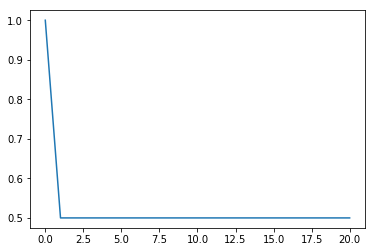

In [137]:
x = np.array([1.2, 1.2])
_, _, vals1, _, _, _, _, steps1 = optimize_steepest_descent_rosenbrock(x, 'steepest_descent')
x = np.array([1.2, 1.2])
_, _, vals2, _, _, _, _, steps2 = optimize_steepest_descent_rosenbrock(x, 'newton_descent')


plt.plot(steps2)